# **Telecom X – Parte 2: Predicción de Cancelación (Churn)**

La misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.
La empresa quiere anticiparse al problema de la cancelación, y se deberá construir un pipeline robusto para esta etapa inicial de modelado.

**Objetivos del Desafío**

* Preparar los datos para el modelado (tratamiento, codificación, normalización).

* Realizar análisis de correlación y selección de variables.

* Entrenar dos o más modelos de clasificación.

* Evaluar el rendimiento de los modelos con métricas.

* Interpretar los resultados, incluyendo la importancia de las variables.

* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

# **Preparación de los Datos**

## **1 - Extracción del Archivo Tratado**

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/JorgeJuarez97/telecomx_machine_learning/refs/heads/main/datos_tratados.csv'

In [3]:
datos = pd.read_csv(url)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


## **2 - Eliminación de Columnas Irrelevantes**

In [4]:
datos = datos.drop(columns='customerID')

In [5]:
datos.sample(1)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
7208,0,male,1,1,0,72,1,1,dsl,1,...,1,0,1,1,two year,1,credit card,84.1,5981.65,2.8


## **3 - Encoding**

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [7]:
categoricas = datos.select_dtypes(include='object').columns
categoricas

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [8]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.head(2)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer,PaymentMethod_credit card,PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [9]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           7267 non-null   int64  
 1   SeniorCitizen                   7267 non-null   int64  
 2   Partner                         7267 non-null   int64  
 3   Dependents                      7267 non-null   int64  
 4   tenure                          7267 non-null   int64  
 5   PhoneService                    7267 non-null   int64  
 6   MultipleLines                   7267 non-null   int64  
 7   OnlineSecurity                  7267 non-null   int64  
 8   OnlineBackup                    7267 non-null   int64  
 9   DeviceProtection                7267 non-null   int64  
 10  TechSupport                     7267 non-null   int64  
 11  StreamingTV                     7267 non-null   int64  
 12  StreamingMovies                 72

## **4 - Verificación de la Proporción de Cancelación (Churn)**

In [10]:
datos_codificados['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


In [11]:
round(datos_codificados['Churn'].value_counts(normalize=True) * 100, 2)

,proportion
Churn,
0,74.28
1,25.72


## **5 - Balanceo de Clases**

### **Oversampling - SMOTE**

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smt = SMOTE()

In [14]:
X = datos_codificados.drop(columns='Churn')
y = datos_codificados['Churn']

In [15]:
X_oversampling, y_oversampling = smt.fit_resample(X, y)

In [16]:
y_oversampling.value_counts()

,count
Churn,
0,5398
1,5398


### **Undersampling - NearMiss(Version 3)**

In [17]:
from imblearn.under_sampling import NearMiss

In [18]:
nm = NearMiss(version=3)

In [19]:
X_undersampling, y_undersampling = nm.fit_resample(X, y)

In [20]:
y_undersampling.value_counts()

,count
Churn,
0,1869
1,1869


## **6 - Normalización o Estandarización**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
normalizacion = MinMaxScaler()

In [23]:
X_oversampling_norm = normalizacion.fit_transform(X_oversampling)

In [24]:
X_undersampling_norm = normalizacion.fit_transform(X_undersampling)

# **Correlación y Selección de Variables**

## **1 - Análisis de Correlación**

In [25]:
corr = datos_codificados.corr()

In [26]:
corr['Churn']

,Churn
Churn,1.000000
SeniorCitizen,0.146733
Partner,-0.148546
Dependents,-0.161384
tenure,-0.344079
PhoneService,0.012571
MultipleLines,0.039343
OnlineSecurity,-0.166828
OnlineBackup,-0.080163
DeviceProtection,-0.063452


## **2 - Análisis Dirigido**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### **Proporcion de cancelación por tipo de contrato**

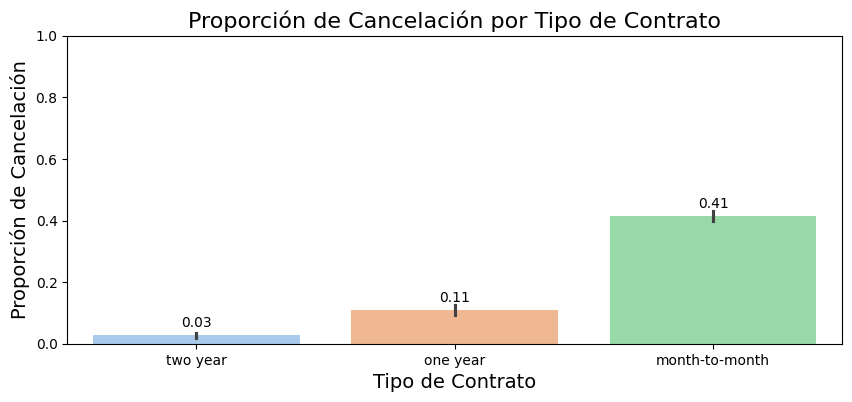

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))

order = datos.groupby('Contract')['Churn'].mean().sort_values().index

ax = sns.barplot(data=datos, x='Contract', y='Churn', palette='pastel', order=order)
ax.set_title('Proporción de Cancelación por Tipo de Contrato', fontsize=16)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Proporción de Cancelación', fontsize=14)
ax.set_ylim(0,1)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

### **Distribución de cancelación por el gasto total**

In [29]:
fig = px.box(datos, x='Total', y='Churn', color='Churn', title='Distribución de cancelación por el gasto total', orientation='h')
fig.update_layout(yaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No calcelaron (Churn = 0)', 'Canceló (Churn = 1)']
    ))

# **Modelado Predictivo**

## **1 - Separación de Datos**

In [30]:
from sklearn.model_selection import train_test_split

### Conjunto de entrenamiento y prueba con Oversampling y datos Normalizados

In [31]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampling_norm, y_oversampling, test_size=0.2, random_state=5)

### Conjunto de entrenamiento y prueba con Undersampling y datos Normalizados

In [32]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampling_norm, y_undersampling, test_size=0.2, random_state=5)

## **2 - Creación de Modelos**

### Modelo de KNN con Oversampling

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()

In [35]:
modelo_knn_os = knn.fit(X_train_os, y_train_os)

In [36]:
modelo_knn_os.score(X_test_os, y_test_os)

0.8203703703703704

### Modelo de KNN con Undersampling

In [37]:
modelo_knn_us = knn.fit(X_train_us, y_train_us)

In [38]:
modelo_knn_us.score(X_test_us, y_test_us)

0.6590909090909091

### Modelo de Random Forest con Oversampling

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(max_depth=10)

In [41]:
modelo_rf_os = rf.fit(X_train_os, y_train_os)

In [42]:
modelo_rf_os.score(X_test_os, y_test_os)

0.8458333333333333

### Modelo de Random Forest con Undersampling

In [43]:
modelo_rf_us = rf.fit(X_train_us, y_train_us)

In [44]:
modelo_rf_us.score(X_test_us, y_test_us)

0.7085561497326203

## **3 - Evaluación de los Modelos**

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Metricas del modelo de KNN

In [46]:
y_prev_knn = modelo_knn_os.predict(X_test_os)

In [47]:
def metricas(y_test, y_prev, modelo):
  print(f'La precision del modelo {modelo} es: {round(precision_score(y_test, y_prev),2)}')
  print(f'La sensibilidad (recall) del modelo {modelo} es: {round(recall_score(y_test, y_prev),2)}')
  print(f'La exactitud (accuracy) del modelo {modelo} es: {round(accuracy_score(y_test, y_prev),2)}')
  print(f'El F1-score del modelo {modelo} es: {round(f1_score(y_test, y_prev),2)}')

In [48]:
metricas(y_test_os, y_prev_knn, modelo_knn_os)

La precision del modelo KNeighborsClassifier() es: 0.73
La sensibilidad (recall) del modelo KNeighborsClassifier() es: 0.76
La exactitud (accuracy) del modelo KNeighborsClassifier() es: 0.74
El F1-score del modelo KNeighborsClassifier() es: 0.75


### Metricas modelo Random Forest

In [49]:
y_prev_rf = modelo_rf_os.predict(X_test_os)

In [50]:
metricas(y_test_os, y_prev_rf, modelo_rf_os)

La precision del modelo RandomForestClassifier(max_depth=10) es: 0.8
La sensibilidad (recall) del modelo RandomForestClassifier(max_depth=10) es: 0.7
La exactitud (accuracy) del modelo RandomForestClassifier(max_depth=10) es: 0.76
El F1-score del modelo RandomForestClassifier(max_depth=10) es: 0.75


### Matriz de Confusion modelo KNN

In [51]:
matriz_confusion_knn = confusion_matrix(y_test_os, y_prev_knn)
print(matriz_confusion_knn)

[[765 307]
 [258 830]]


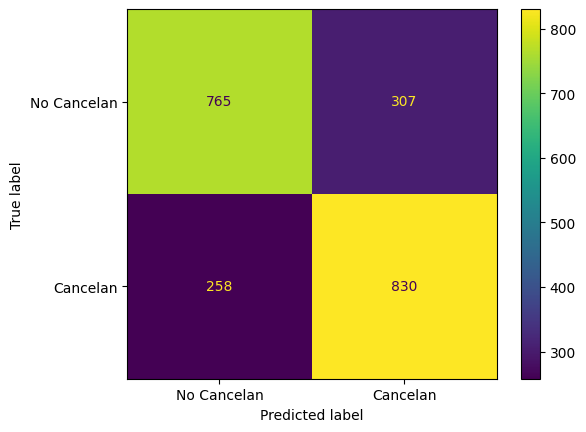

In [52]:
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_knn, display_labels=['No Cancelan', 'Cancelan'])
visualizacion_knn.plot()

### Matriz de Confusion modelo Random Forest

In [53]:
matriz_confusion_rf = confusion_matrix(y_test_os, y_prev_rf)
print(matriz_confusion_rf)

[[877 195]
 [322 766]]


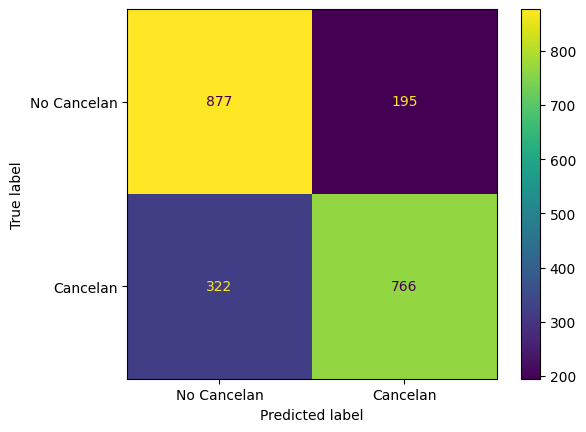

In [55]:
visualizacion_rf = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=['No Cancelan', 'Cancelan'])
visualizacion_rf.plot()

### Curva ROC de los modelos de KNN y Random Forest

In [61]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [62]:
print(f'El area bajo la curva ROC del modelo KNN es: {roc_auc_score(y_test_os, y_prev_knn)}')
print(f'El area bajo la curva ROC del modelo Random Forest es: {roc_auc_score(y_test_os, y_prev_rf)}')

El area bajo la curva ROC del modelo KNN es: 0.738243525021949
El area bajo la curva ROC del modelo Random Forest es: 0.761070566286216


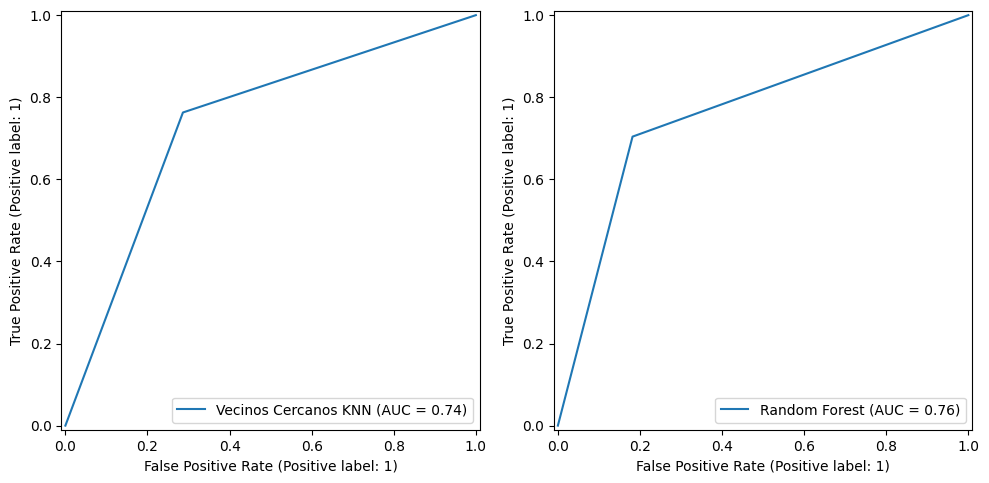

In [60]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

RocCurveDisplay.from_predictions(y_test_os, y_prev_knn, name='Vecinos Cercanos KNN', ax=ax[0])
RocCurveDisplay.from_predictions(y_test_os, y_prev_rf, name='Random Forest', ax=ax[1])

plt.tight_layout()
plt.show()

### Curva de Precision x Recall de los modelos de KNN y Random Forest

In [63]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [64]:
print(f'El score promedio de precision vs recal del modelo KNN es: {average_precision_score(y_test_os, y_prev_knn)}')
print(f'El score promedio de precision vs recal del modelo Random Forest es: {average_precision_score(y_test_os, y_prev_rf)}')

El score promedio de precision vs recal del modelo KNN es: 0.6763311173193991
El score promedio de precision vs recal del modelo Random Forest es: 0.7102580429790137


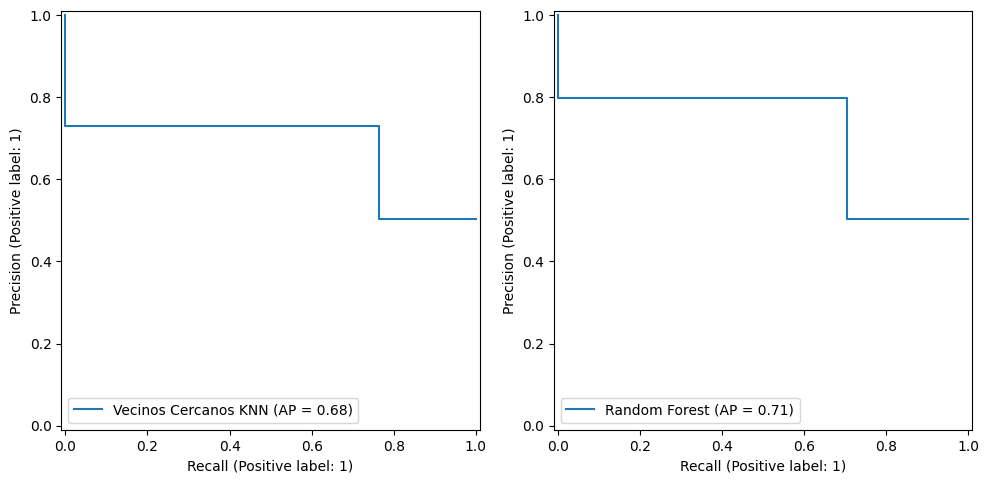

In [65]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

PrecisionRecallDisplay.from_predictions(y_test_os, y_prev_knn, name='Vecinos Cercanos KNN', ax=ax[0])
PrecisionRecallDisplay.from_predictions(y_test_os, y_prev_rf, name='Random Forest', ax=ax[1])

plt.tight_layout()
plt.show()

# **Interpretación y Conclusiones**

## **1 - Análisis de la Importancia de las Variables**

### Modelo Random Forest 'Features'

In [89]:
features = modelo_rf_os.feature_importances_

In [93]:
X = pd.DataFrame(X_oversampling_norm, columns=X_oversampling.columns)
X.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer,PaymentMethod_credit card,PaymentMethod_electronic check,PaymentMethod_mailed check
0,0.0,1.0,1.0,0.125,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.125,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
y = y_oversampling

In [101]:
features_importances = pd.DataFrame({'Features': X.columns,
                                     'Importances': (features*100).round(2)}).sort_values('Importances', ascending=False)
features_importances.reset_index(drop=True, inplace=True)
features_importances

,Features,Importances
0,tenure,19.23
1,Total,19.20
2,Monthly,9.68
3,CuentasDiarias,8.83
4,Contract_month-to-month,6.11
5,TechSupport,3.08
6,PaymentMethod_electronic check,3.00
7,OnlineSecurity,2.77
8,Contract_one year,2.48
9,Contract_two year,2.39


In [113]:
ct_features = [i if i !=0 else 1 for i in range(16, 21)]
ct_features

[16, 17, 18, 19, 20]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [107]:
model_features = RandomForestClassifier(max_depth=10, random_state=5)

In [116]:
resultados = pd.DataFrame(index=['Precision', 'Recall', 'Accuracy', 'F1_score'])

In [110]:
def metricas_modelos_features(y_test, y_pred):
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  metricas = {
      'Precision': round(precision,2),
      'Recall': round(recall,2),
      'Accuracy': round(accuracy,2),
      'F1_score': round(f1,2)
  }
  return metricas

In [117]:
for i in ct_features:
  selected_features = features_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = metricas_modelos_features(y_test, y_pred)
  resultados[i] = list(metricas.values())

In [118]:
resultados

,16,17,18,19,20
Precision,0.82,0.82,0.82,0.82,0.82
Recall,0.86,0.87,0.86,0.86,0.87
Accuracy,0.83,0.84,0.84,0.83,0.84
F1_score,0.84,0.85,0.84,0.84,0.84


In [119]:
selected_features = features_importances['Features'].values[:17]
X_selected_features = X[selected_features]
X_selected_features.head(2)

,tenure,Total,Monthly,CuentasDiarias,Contract_month-to-month,TechSupport,PaymentMethod_electronic check,OnlineSecurity,Contract_one year,Contract_two year,PaperlessBilling,Dependents,OnlineBackup,MultipleLines,Partner,InternetService_fiber optic,DeviceProtection
0,0.125,0.068315,0.471144,0.471642,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.125,0.062454,0.414428,0.414925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [138]:
X_selected_features.columns

Index(['tenure', 'Total', 'Monthly', 'CuentasDiarias',
       'Contract_month-to-month', 'TechSupport',
       'PaymentMethod_electronic check', 'OnlineSecurity', 'Contract_one year',
       'Contract_two year', 'PaperlessBilling', 'Dependents', 'OnlineBackup',
       'MultipleLines', 'Partner', 'InternetService_fiber optic',
       'DeviceProtection'],
      dtype='object')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=5)

In [121]:
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100,150,200]
}

In [123]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [124]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [125]:
model_grid = GridSearchCV(RandomForestClassifier(random_state=5), param_grid=param_grid, cv=skf, scoring='recall')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='recall')

In [126]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [127]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = metricas_modelos_features(y_test, y_pred_model_grid)

In [128]:
metricas_model_grid

{'Precision': 0.79, 'Recall': 0.87, 'Accuracy': 0.82, 'F1_score': 0.83}

In [129]:
resultados['model_grid'] = list(metricas_model_grid.values())
resultados

,16,17,18,19,20,model_grid
Precision,0.82,0.82,0.82,0.82,0.82,0.79
Recall,0.86,0.87,0.86,0.86,0.87,0.87
Accuracy,0.83,0.84,0.84,0.83,0.84,0.82
F1_score,0.84,0.85,0.84,0.84,0.84,0.83


### Matriz de Confusion Model Grid con Random Forest

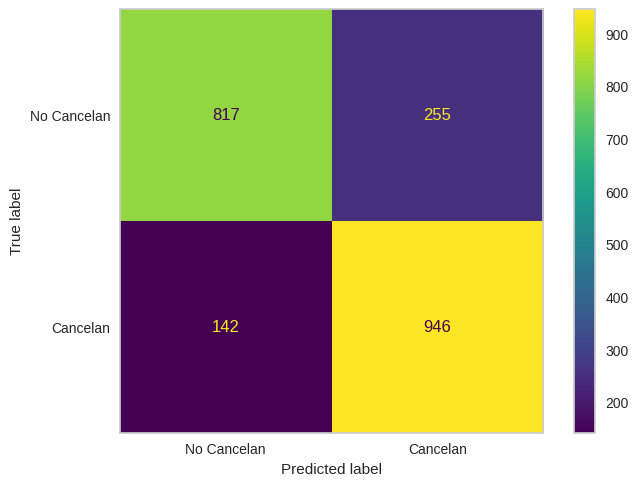

In [139]:
matriz_confusion_model_grid = confusion_matrix(y_test, y_pred_model_grid)
visualizacion_model_grid = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_model_grid, display_labels=['No Cancelan', 'Cancelan'])
visualizacion_model_grid.plot()
plt.grid(False)
plt.show()

## **2 - Conclusión**

### Informe de Análisis de Cancelación de Clientes y Estrategias de Retención

#### **Introducción**

Este informe tiene como objetivo identificar los factores clave que influyen en la cancelación de clientes y proponer estrategias de retención basadas en los hallazgos de un modelo de Machine Learning. Para este análisis, se entrenaron y evaluaron diferentes modelos de clasificación, siendo el Random Forest Classifier el que demostró el mejor rendimiento en la generalización de la cancelación de clientes.

#### **Metodología**

Se utilizaron los siguientes modelos de clasificación:

* K-Nearest Neighbors (KNN) Classifier

* Random Forest Classifier

El Random Forest Classifier inicial se mejoró aún más utilizando GridSearchCV para la optimización de hiperparámetros. Los parámetros explorados en param_grid fueron:

* max_depth: [5, 10, 15]

* min_samples_leaf: [1, 2, 3]

* min_samples_split: [2, 4, 6]

* n_estimators: [100, 150, 200]

La estrategia de validación cruzada utilizada fue StratifiedKFold (SKF) con n_splits=5, shuffle=True y random_state=5. La métrica de evaluación principal para la optimización fue el **recall**, dada su importancia en la identificación de clientes propensos a la cancelación. El random_state para el modelo base de Random Forest se fijó en 5.

#### **Rendimiento del Modelo**

A continuación, se presentan las métricas de rendimiento para el Random Forest Classifier inicial y el modelo optimizado con GridSearchCV:

**Random Forest Classifier (Inicial - max_depth=10):**

* Precisión: 0.80

* Sensibilidad (Recall): 0.70

* Exactitud (Accuracy): 0.76

* F1-score: 0.75

**Random Forest Classifier (Optimizado con GridSearchCV):**

Los mejores parámetros encontrados por GridSearchCV fueron: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}.

* Precisión: 0.79

* Sensibilidad (Recall): 0.87

* Exactitud (Accuracy): 0.82

* F1-score: 0.83

Como se puede observar, el modelo optimizado con GridSearchCV mostró una mejora significativa en todas las métricas, especialmente en la sensibilidad (recall), que aumentó de **0.70 a 0.87**. Esto indica que el modelo optimizado es mucho más efectivo en la identificación correcta de clientes que eventualmente cancelarán su servicio, lo cual es crucial para implementar estrategias de retención proactivas.

#### **Factores Clave que Influyen en la Cancelación**

El Random Forest Classifier, al ser un modelo basado en árboles, permite identificar la importancia de las variables (features) en la predicción. Las características más influyentes en la cancelación de clientes, según el modelo, son las siguientes:

* Tenure: La duración de la relación del cliente con la empresa es un factor crítico. Es común que los clientes con menor antigüedad sean más propensos a la cancelación, o que en etapas específicas de su ciclo de vida (por ejemplo, después de un período promocional inicial) aumente el riesgo de abandono.

* Total: El monto total facturado al cliente. Podría indicar que los clientes con facturas acumuladas más bajas o más altas tienen diferentes propensiones a cancelar.

* Monthly: El importe que el cliente paga cada mes. Los clientes que perciben un alto costo mensual en relación con el valor que reciben son más propensos a cancelar.

* CuentasDiarias: Aunque no se especificó la naturaleza exacta de esta variable, su importancia sugiere que la frecuencia o el patrón de uso diario del servicio podría ser un indicador de satisfacción o insatisfacción.

* Contract_month-to-month: Los clientes con contratos mensuales tienen una flexibilidad mucho mayor para cancelar en comparación con aquellos con contratos a más largo plazo (uno o dos años). Este tipo de contrato es un indicador de alto riesgo de abandono.

* TechSupport: La ausencia o baja calidad del soporte técnico es un irritante común que lleva a la cancelación. Los clientes que no tienen soporte técnico o que reportan problemas recurrentes son más propensos a irse.

* PaymentMethod_electronic check: Este método de pago ha demostrado ser un factor de riesgo. Podría estar asociado con un segmento de clientes más volátil o con experiencias negativas relacionadas con el proceso de pago.

* OnlineSecurity: La falta de seguridad en línea como un servicio adicional podría ser un factor para la cancelación, lo que sugiere que los clientes valoran la seguridad de sus datos y transacciones.

* Contract_one year y Contract_two year: Estos tipos de contratos, al ser a largo plazo, actúan como factores de retención. Los clientes con estos contratos son menos propensos a cancelar, lo que resalta la importancia de incentivar compromisos a más largo plazo.

* PaperlessBilling: Los clientes que optan por la facturación electrónica pueden tener un comportamiento diferente. Su relación con la cancelación podría ser directa o inversa dependiendo de la facilidad de uso del servicio.

* Dependents: La presencia de dependientes podría influir en la estabilidad del cliente, lo que podría indicar una menor propensión a cancelar servicios esenciales para el hogar.

* OnlineBackup: Similar a la seguridad en línea, la falta de este servicio podría contribuir a la insatisfacción y, en consecuencia, a la cancelación.

* MultipleLines: Los clientes con múltiples líneas de servicio pueden tener una mayor dependencia del proveedor y, por lo tanto, una menor propensión a cancelar.

* Partner: La presencia de una pareja en el hogar podría estar relacionada con una mayor estabilidad del cliente.

* InternetService_fiber optic: El tipo de servicio de internet puede influir en la satisfacción del cliente. Si hay problemas con la fibra óptica (velocidad, interrupciones), podría ser un factor de cancelación.

* DeviceProtection: Similar a otros servicios de valor añadido, la ausencia o percepción negativa de este servicio podría ser un factor de riesgo.

#### **Estrategias de Retención Basadas en los Resultados**

Basándose en los factores identificados, se proponen las siguientes estrategias de retención:

**1 - Enfocarse en Clientes con Contratos Mes a Mes**

Estrategia: Implementar programas de incentivos para que los clientes con contratos mes a mes migren a planes de 1 o 2 años. Estos incentivos pueden incluir descuentos, beneficios adicionales (más datos, servicios premium) o tarifas preferenciales.

Acción: Contactar proactivamente a estos clientes después de un período inicial (ej., 3-6 meses) para ofrecerles opciones de contratos más largos con beneficios claros.

**2 - Mejorar la Experiencia del Cliente en Soporte Técnico:**

Estrategia: Fortalecer el departamento de soporte técnico, asegurando tiempos de respuesta rápidos, resolución efectiva de problemas y personal capacitado y empático.

Acción: Monitorear de cerca las interacciones de soporte técnico, implementar encuestas de satisfacción post-interacción y utilizar los datos para identificar y corregir puntos débiles. Considerar un seguimiento proactivo a clientes que hayan experimentado múltiples problemas técnicos.

**3 - Monitorear y Optimizar la Facturación y los Cargos Mensuales/Totales:**

Estrategia: Asegurar la transparencia en la facturación y ofrecer planes que se ajusten a las necesidades y presupuestos de los clientes.

Acción: Analizar los patrones de "Cargos Mensuales" y "Cargos Totales" para identificar umbrales de riesgo. Ofrecer opciones de ajuste de plan o paquetes que brinden un mejor valor a clientes que se acerquen a esos umbrales o que expresen preocupación por los costos.

**4 - Atención Especial a Clientes con Baja Antigüedad (tenure):**

Estrategia: Implementar un programa de "bienvenida" o "primeros meses" que asegure una experiencia positiva desde el inicio.

Acción: Realizar llamadas de seguimiento proactivas, ofrecer recursos para el uso del servicio y estar atentos a cualquier señal de insatisfacción temprana. Considerar ofrecer beneficios especiales o un soporte dedicado durante este período crítico.

**5 - Optimizar Métodos de Pago y Promover la Seguridad Online:**

Estrategia: Investigar por qué el "cheque electrónico" está asociado a la cancelación y, si es posible, ofrecer alternativas o mejorar la experiencia para los usuarios de este método. Promover activamente los servicios de seguridad en línea y copia de seguridad.

Acción: Revisar el proceso de pago con cheque electrónico para identificar fricciones. Destacar los beneficios y la importancia de los servicios de seguridad y backup en la comunicación con los clientes, posiblemente ofreciendo pruebas gratuitas o descuentos iniciales.

#### **Conclusión**

El análisis detallado y la optimización del modelo Random Forest han permitido identificar con alta precisión a los clientes propensos a la cancelación y los factores que más influyen en esta decisión. La mejora significativa en la sensibilidad (recall) del modelo optimizado a 0.87 es fundamental para el éxito de las iniciativas de retención. Al enfocarse en las estrategias propuestas, la empresa estará mejor posicionada para reducir la tasa de abandono de clientes y fomentar relaciones a largo plazo.

# **Exportar el modelo champion**

In [140]:
import pickle

In [141]:
try:
  with open('modelo_grid_random_forest_champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
    print('Modelo serializado con éxito')
except Exception as e:
  print(f'Error al serializar el modelo: {e}')

Modelo serializado con éxito
